# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [9]:
# cat=Table.read('../data/CDFS-SWIRE/SPIRE/dmu26_XID+SPIRE_CDFS-SWIRE_cat_20170919.fits')
# from astropy
# import units as u
# cat['RA'].unit=u.deg
# cat['Dec'].unit=u.deg

In [4]:
cat=Table.read('./data/dmu26_XID+SPIRE_CDFS_cat.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [5]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J033650.824-295620.783,54.211766390022845,-29.9391064859918,1.0121745,2.394448,0.2562872,0.6808803,1.6589379,0.18741527,1.2487581,2.9377177,0.30956334,-2.0876973,-3.398482,-4.1253595,4.047882,4.743367,3.6061635,0.9997019,0.99948925,1.0009679,3522.9302,3644.6868,3070.8694,0.625,0.932,0.217
HELP_J033655.442-295449.596,54.23101021455793,-29.91377659143576,22.208517,24.533165,19.851318,20.025755,22.659372,17.463583,7.6451144,9.962016,5.236497,-1.9434206,-3.151525,-3.572033,3.9907084,4.773771,3.512655,0.998634,0.9989004,0.99911183,4128.146,2846.4238,2837.927,1.0,0.999,0.412
HELP_J033616.314-295548.181,54.067976200022855,-29.9300503059918,18.960533,22.220718,15.765882,18.428717,21.564632,15.158151,12.515343,15.440312,9.424943,2.0529943,1.7660528,1.1253681,6.5019565,6.6706357,5.135,0.9984564,0.99813384,0.99945027,3589.5815,2394.5366,4393.216,1.0,1.0,0.991
HELP_J033601.094-295546.425,54.00455690002285,-29.929562435991798,12.849573,15.215422,10.359807,10.493566,13.186071,7.709316,12.518165,15.027837,9.84175,-0.55454624,-1.4567759,-2.615848,4.991591,5.366192,4.524954,0.9994284,0.9988761,0.9987905,3280.3105,3985.1978,4549.9287,1.0,1.0,1.0
HELP_J033606.888-295518.496,54.028701300022846,-29.9218044959918,1.5000136,3.2340024,0.39275634,0.6255214,1.6243418,0.17688337,0.6634692,1.7976468,0.16851547,-0.55454624,-1.4567759,-2.615848,4.991591,5.366192,4.524954,0.99950635,0.99927205,0.99842817,3727.723,4191.263,4282.4365,0.974,1.0,0.979
HELP_J033610.856-295506.940,54.04523478002285,-29.918594405991797,24.299248,26.561121,21.98415,25.552162,28.05468,23.065084,14.268298,16.947132,11.675502,-0.55454624,-1.4567759,-2.615848,4.991591,5.366192,4.524954,0.99856794,0.9992947,0.9989526,4941.779,3647.3599,5469.963,1.0,1.0,1.0
HELP_J033607.350-295516.790,54.030623590022856,-29.9213304359918,1.6027712,3.4411585,0.48794842,0.535164,1.3720906,0.14926992,0.5861132,1.5626923,0.15153347,-0.55454624,-1.4567759,-2.615848,4.991591,5.366192,4.524954,0.99916327,0.99912876,0.9984456,3258.4705,3392.4993,3146.7866,0.986,1.0,0.974
HELP_J033555.160-295410.647,53.97983175002285,-29.9029574059918,41.294952,43.724686,38.85356,13.620832,16.334528,10.928916,1.8181103,3.8548596,0.62765807,-0.55454624,-1.4567759,-2.615848,4.991591,5.366192,4.524954,0.9992789,0.99859565,0.9990769,2943.8303,2622.6846,4613.4834,0.998,1.0,0.821


## Look at Symmetry of PDFs to determine depth level of catalogue

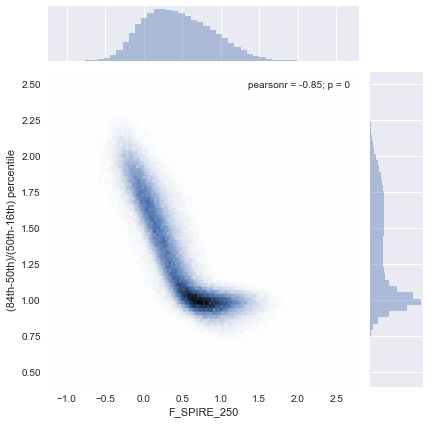

In [11]:
# skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
# skew.name='(84th-50th)/(50th-16th) percentile'
# g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

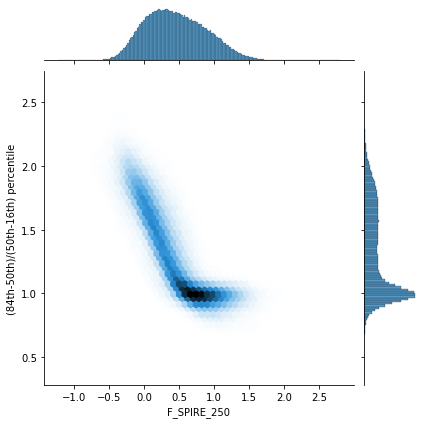

In [6]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

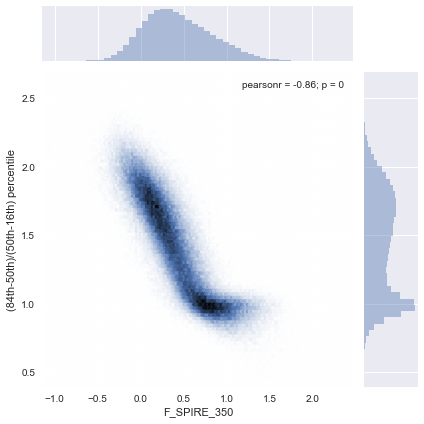

In [12]:
# skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
# skew.name='(84th-50th)/(50th-16th) percentile'
# g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

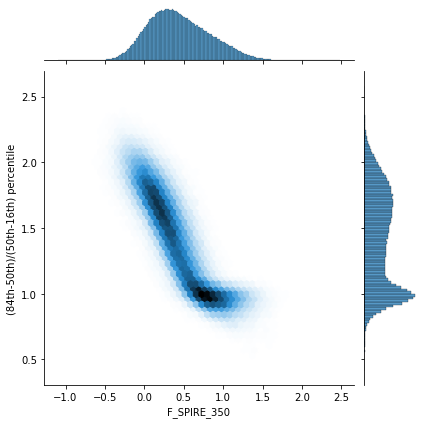

In [7]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

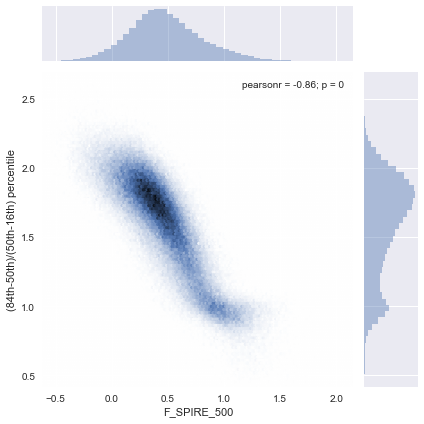

In [13]:
# skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
# skew.name='(84th-50th)/(50th-16th) percentile'
# g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

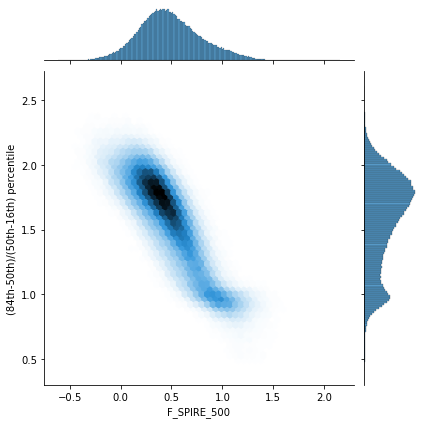

In [8]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

## Add flag to catalogue

In [9]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))



In [10]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)


In [11]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

194039 207668 237660 283406


In [12]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True


In [14]:
cat.write('./data/dmu26_XID+SPIRE_CDFS-SWIRE_cat_20201208.fits', format='fits',overwrite=True)


### Check Map


In [15]:
from astropy.io import fits
import pylab as plt

In [17]:
Pval=fits.open('./data/dmu26_XID+SPIRE_psw_CDFS-SWIRE_Bayes_Pval_20201208.fits')
Pval2=fits.open('./data/dmu26_XID+SPIRE_psw_CDFS-SWIRE_Bayes_Pval_20170919.fits')


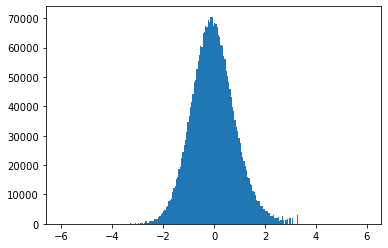

In [18]:
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

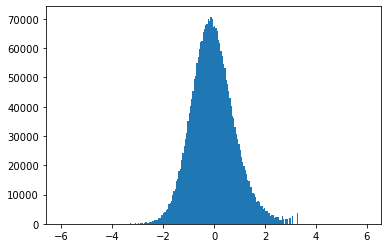

In [19]:
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05));

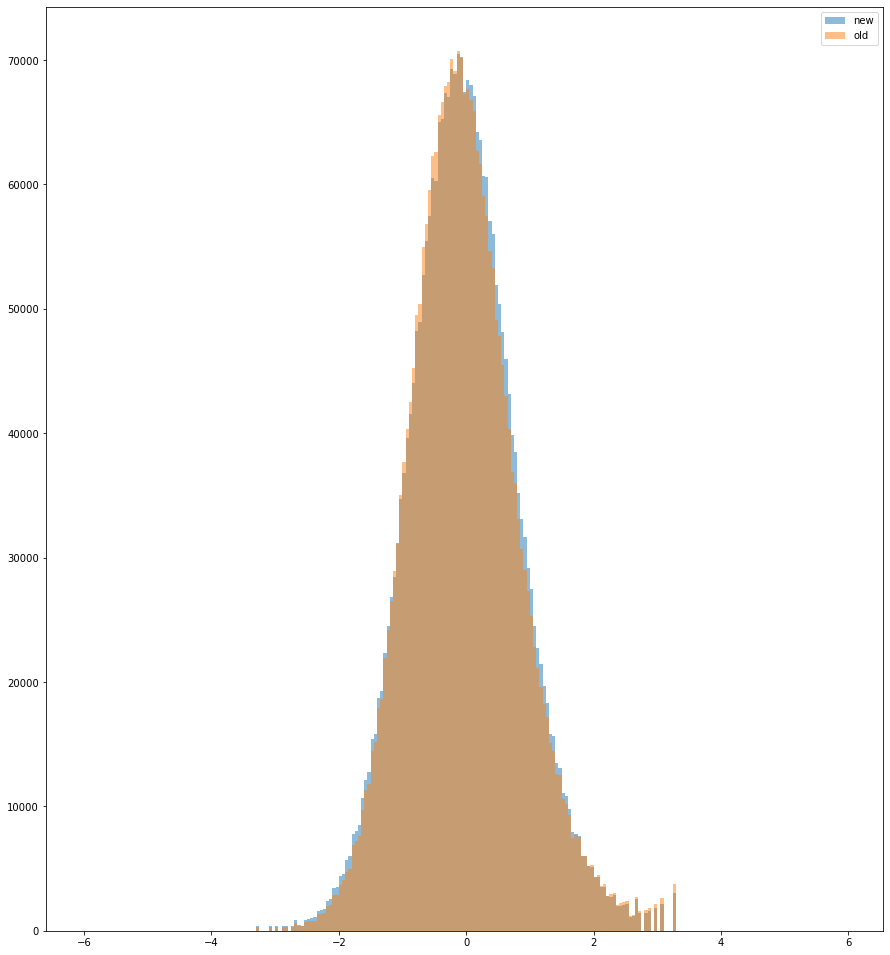

In [20]:
plt.figure(figsize=(15,17))
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='old');
plt.legend()